# Simple Linear Regression (using closed form solution)

### Create the Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
X = np.random.randint(1,30, size=(20,1))
X.shape

(20, 1)

In [4]:
# actual distribution model
Y = 4*X + 5 + np.random.randn(20,1) + np.random.randn(20,1)
Y.shape

(20, 1)

In [5]:
df = pd.DataFrame({'X': X.flatten(), 'Y': Y.flatten()})
df.head()

,X,Y
0,10,43.345194
1,12,53.888410
2,22,95.136754
3,6,26.596264
4,15,67.041691


### Plot the Dataset

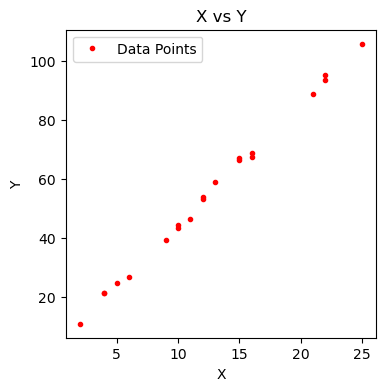

In [6]:
plt.figure(figsize=(4,4))
plt.plot(X,Y, 'r.' ,label="Data Points")
plt.title("X vs Y")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

### Prediction using the closed form of linear regression in case of one input feature and one output feature


      1.   If we have a one input features in the data


*   prediction fucntion will be a line
$Y = mX + c
$
*   Loss Funciton measures how far an estimates value is from its true value by using the loss function it will give the best parameter value of m and c



*   $E = \sum_{i=1}^{n} \left( y^{(i)} - (w_0 + w_1 x^{(i)}) \right)^2
$ also known as MSE
*   prediction fucntion  $\hat{y}^{(i)} = w_0 + w_1 x$
*   by taking the derivative of the loss function w.r.t parameters we can get the vlaue of the parameters by solving the below two equations

*   $\overline{Y} = w_0 + w_1 \overline{X}$

*   $\overline{XY} = w_0 \overline{X} + w_1 \overline{X^2}$



In [ ]:
# closed form solution
ybar = np.mean(Y)
xbar = np.mean(X)
xybar = np.mean(X*Y)
x2bar = np.mean(X**2)

# solution of linear equation

# Coefficients matrix A
A = np.array([[1, xbar], [xbar, x2bar]])

# Constants matrix B
B = np.array([ybar, xybar])

# 1. Solving using numpy.linalg.solve() (Matrix Method)
# Directly solving Ax = B
solution = np.linalg.solve(A, B)

# print("Solution using Matrix Method (x, y):")
print(solution)
y_pred = solution[0] + solution[1]*X
# print(y_pred)

[4.63724748 4.00928762]


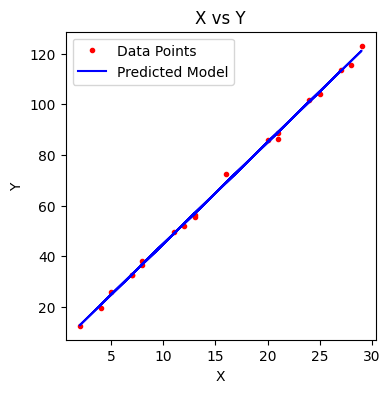

In [ ]:
plt.figure(figsize=(4,4))
plt.plot(X,Y, 'r.' ,label="Data Points")
plt.plot(X,y_pred, 'b-',label="Predicted Model" )
plt.title("X vs Y")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [ ]:
# calculating the loss
print(X.shape, y_pred.shape)
def loss(X, y_pred):
  loss = (1/X.size) * np.sum((y_pred - Y)**2)
  return loss
print("Error MSE loss is :: ", loss(X, y_pred))
print("Error RMSE loss is :: ", loss(X, y_pred) ** (1/2))


(20, 1) (20, 1)
Error MSE loss is ::  1.8336009832650184
Error RMSE loss is ::  1.3541052334530792


In [ ]:
def predict(x):
  return solution[0] + solution[1]*x
predict(2)

12.70196406468554

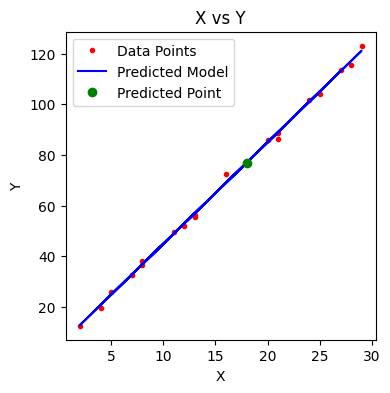

In [ ]:
plt.figure(figsize=(4,4))
plt.plot(X,Y, 'r.' ,label="Data Points")
plt.plot(X,y_pred, 'b-',label="Predicted Model" )
plt.plot(18,predict(18), 'go',label="Predicted Point" )
plt.title("X vs Y")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

### Loss Function (w0 and L(w)) (w1 and L(w))

In [ ]:
def lossForEachPoint(x,y,y_pred_for_each):
  loss = (1/x.size) * np.sum((y_pred_for_each - y)**2)
  return loss

lossArray = []

for i in range(X.size):
  y_pred_for_each = solution[0] + solution[1]*i
  # print(i, lossForEachPoint(X[i],Y[i] ,y_pred_for_each))
  lossArray.append(lossForEachPoint(X[i],Y[i] ,y_pred_for_each))

lossArray = np.array(lossArray).reshape(-1,1)
# print(lossArray.shape)

(20, 1)


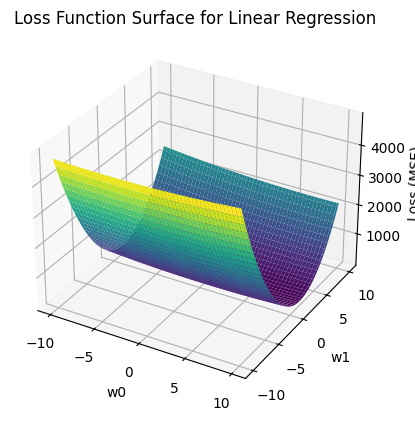

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate sample data points (x, y)
np.random.seed(0)
x = np.random.uniform(-10, 10, 100)
y_true = 3 + 2 * x + np.random.normal(0, 2, 100)  # True relationship with some noise

# Define the loss function (Mean Squared Error)
def loss(w0, w1, x, y):
    return np.mean((y - (w0 + w1 * x))**2)

# Create a mesh grid for w0 and w1
w0_vals = np.linspace(-10, 10, 100)
w1_vals = np.linspace(-10, 10, 100)
W0, W1 = np.meshgrid(w0_vals, w1_vals)

# Calculate the loss over the grid of w0 and w1 values
Z = np.array([[loss(w0, w1, x, y_true) for w0 in w0_vals] for w1 in w1_vals])

# Plotting the 3D surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(W0, W1, Z, cmap='viridis', edgecolor='none')

# Add labels and title
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('Loss (MSE)')
ax.set_title('Loss Function Surface for Linear Regression')

# Show the plot
plt.show()


# Simple Linear Regression using Gradient Algorithm

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
X = np.random.randint(1,30, size=(20,1))
# X.shape

In [ ]:
# actual distribution model
Y = 4*X + 5 + np.random.randn(20,1) + np.random.randn(20,1)
# Y.shape

In [ ]:
df = pd.DataFrame({'X': X.flatten(), 'Y': Y.flatten()})
# df.head()

In [ ]:
# plt.figure(figsize=(4,4))
# plt.plot(X,Y, 'r.' ,label="Data Points")
# plt.title("X vs Y")
# plt.xlabel("X")
# plt.ylabel("Y")
# plt.legend()
# plt.show()

### Gradient Descent Rule

> Since forming a close solution will not possible always it also inceases the time complexity so we use the **GRADIENT DESCENT ALGO** to find the best optimal parameter of Linear Regression

$
\text{1. Initialize } \mathbf{w} \text{ (randomly or with zeros)} \\
\text{2. Repeat until convergence:} \\
\quad \mathbf{w} = \mathbf{w} - \alpha \nabla_\mathbf{w} J(\mathbf{w}) \\
\text{Where the gradient of the cost function } J(\mathbf{w}) \text{ is:} \\
\quad \nabla_\mathbf{w} J(\mathbf{w}) = 2 X^T (X \mathbf{w} - \mathbf{y})$


In [ ]:
# w0^new = w0 - alpha * (var_sum) * (-1)
# w1^new = w1 - alpha * (var_sum) * (-X^(i))
# var_sum = 2/N * summation(y^(i) - ycap^(i))

Epoch 0, w0: 2.1250783842039342, w1: 4.321559307488265, Loss: 10.838043131282282


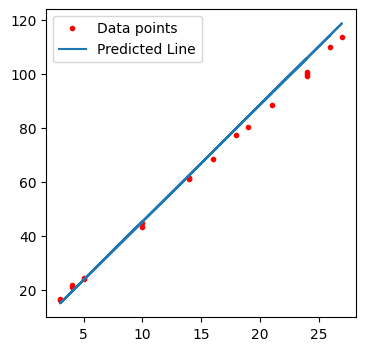

Epoch 300, w0: 2.7641685752368987, w1: 4.108180325440161, Loss: 1.4126723913198282


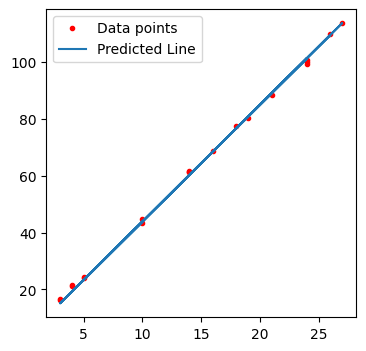

Epoch 600, w0: 3.24591379841981, w1: 4.0827456847543795, Loss: 1.0221371738807292


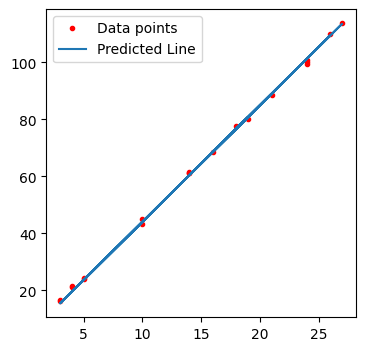

Epoch 900, w0: 3.6037568946846275, w1: 4.0638526887527835, Loss: 0.8066553438024447


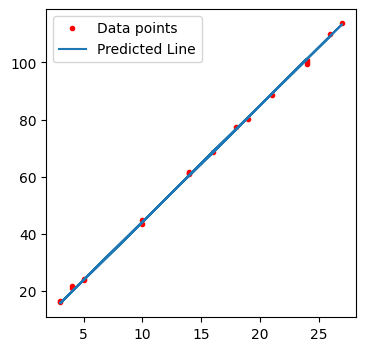

In [ ]:
# Initial weights and learning rate
w0 = 2
w1 = 2
alpha = 0.002

# Gradient Descent Algorithm
def gradientDescentalgo(w0, w1, alpha, epoch = 1000):
    N = X.size  # Number of data points
    for i in range(epoch):
        # Calculate the gradients
        dw0 = -2 * np.sum(Y - (w0 + w1 * X)) / N
        dw1 = -2 * np.sum((Y - (w0 + w1 * X)) * X) / N

        # Update the weights
        w0 -= alpha * dw0
        w1 -= alpha * dw1

        # Optionally, print the loss every 100 iterations to track progress
        if i % 300 == 0:
            loss = np.mean((Y - (w0 + w1 * X))**2)
            print(f"Epoch {i}, w0: {w0}, w1: {w1}, Loss: {loss}")
            plt.figure(figsize=(4,4))
            y_pred_gd = w0 + w1 * X
            plt.plot(X,Y,'r.', label="Data points")
            plt.plot(X, y_pred_gd, label="Predicted Line")
            plt.legend()
            plt.show()

    return w0, w1

# Running the Gradient Descent
w0_final, w1_final = gradientDescentalgo(w0, w1, alpha, epoch=1000)

Final values after Gradient Descent: w0 = 3.7003429272885677, w1 = 4.058753248392346


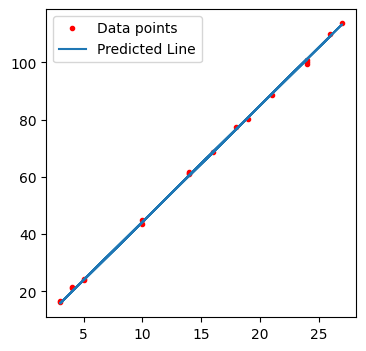

In [ ]:
print(f"Final values after Gradient Descent: w0 = {w0_final}, w1 = {w1_final}")
plt.figure(figsize=(4,4))
y_pred_gd = w0_final + w1_final * X
plt.plot(X,Y,'r.', label="Data points")
plt.plot(X, y_pred_gd, label="Predicted Line")
plt.legend()
plt.show()

In [ ]:
def loss(X, Y, y_pred_gd):
  loss = (1/X.size) * np.sum((y_pred_gd - Y)**2)
  return loss
print("Error MSE loss is :: ", loss(X, Y, y_pred_gd))
print("Error RMSE loss is :: ", loss(X, Y, y_pred_gd) ** (1/2))


Error MSE loss is ::  0.7593940727904824
Error RMSE loss is ::  0.8714321963242364


# Muliple Linear Regression

### Create a dataset

In [ ]:
salary_df = pd.read_csv("/content/Boston (1).csv")
salary_df = salary_df.drop(columns=salary_df.columns[0])
salary_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
X = salary_df.iloc[:,:-1].to_numpy()
Y = salary_df.iloc[:,-1].to_numpy().reshape(-1,1)
ones_mat = np.ones((X.shape[0],1))
X = np.hstack((ones_mat, X))
# X = X
X.shape, Y.shape, X.shape[0]

((506, 14), (506, 1), 506)

In [ ]:
class linearRegression():
  def __init__(self):
    self.w = None

  def fitusingClosedForm(self, X, Y):
    # w = X^T.X)^-1 X^T.Y
    # self.w = np.ones(shape=(X.shape[0], 1), dtype="int")
    # self.w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
    xtxinv = np.linalg.inv(X.T.dot(X))
    xty = X.T.dot(Y)
    xtxinvxt = xtxinv.dot(xty)
    self.w = xtxinvxt
    # self.w = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(Y)
    return self.w

  def predict(self, X):
    return X.dot(self.w)

  def loss(self, X, Y, y_pred):
    loss = (1/X.size) * np.sum((y_pred - Y)**2)
    return loss * (1/2)

  def r2score(self, X, Y, y_pred):
    u = np.sum((Y - y_pred)**2)
    v = np.sum((Y - np.mean(Y))**2)
    return 1 - (u/v)

  def adjustedr2score(self, X, Y, y_pred):
    r2 = self.r2score(X, Y, y_pred)
    n = X.shape[0]
    p = X.shape[1]
    return 1 - (1 - r2)*(n-1)/(n-p-1)

m = linearRegression()
m.fitusingClosedForm(X,Y)
print(m.loss(X,Y, m.predict(X)))
print(m.r2score(X,Y,m.predict(X)))
print(m.adjustedr2score(X,Y,m.predict(X)))

0.7819582564903287
0.7406426641094095
0.7332475465891075


# Multiple Linear Regression (based on real state dataset)

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
rs_df = pd.read_csv("./Realestate.csv")
rs_df = rs_df.drop("No",axis=1)
# rs_df = rs_df.drop(columns = ["No"],axis=1, inplace=True)
rs_df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


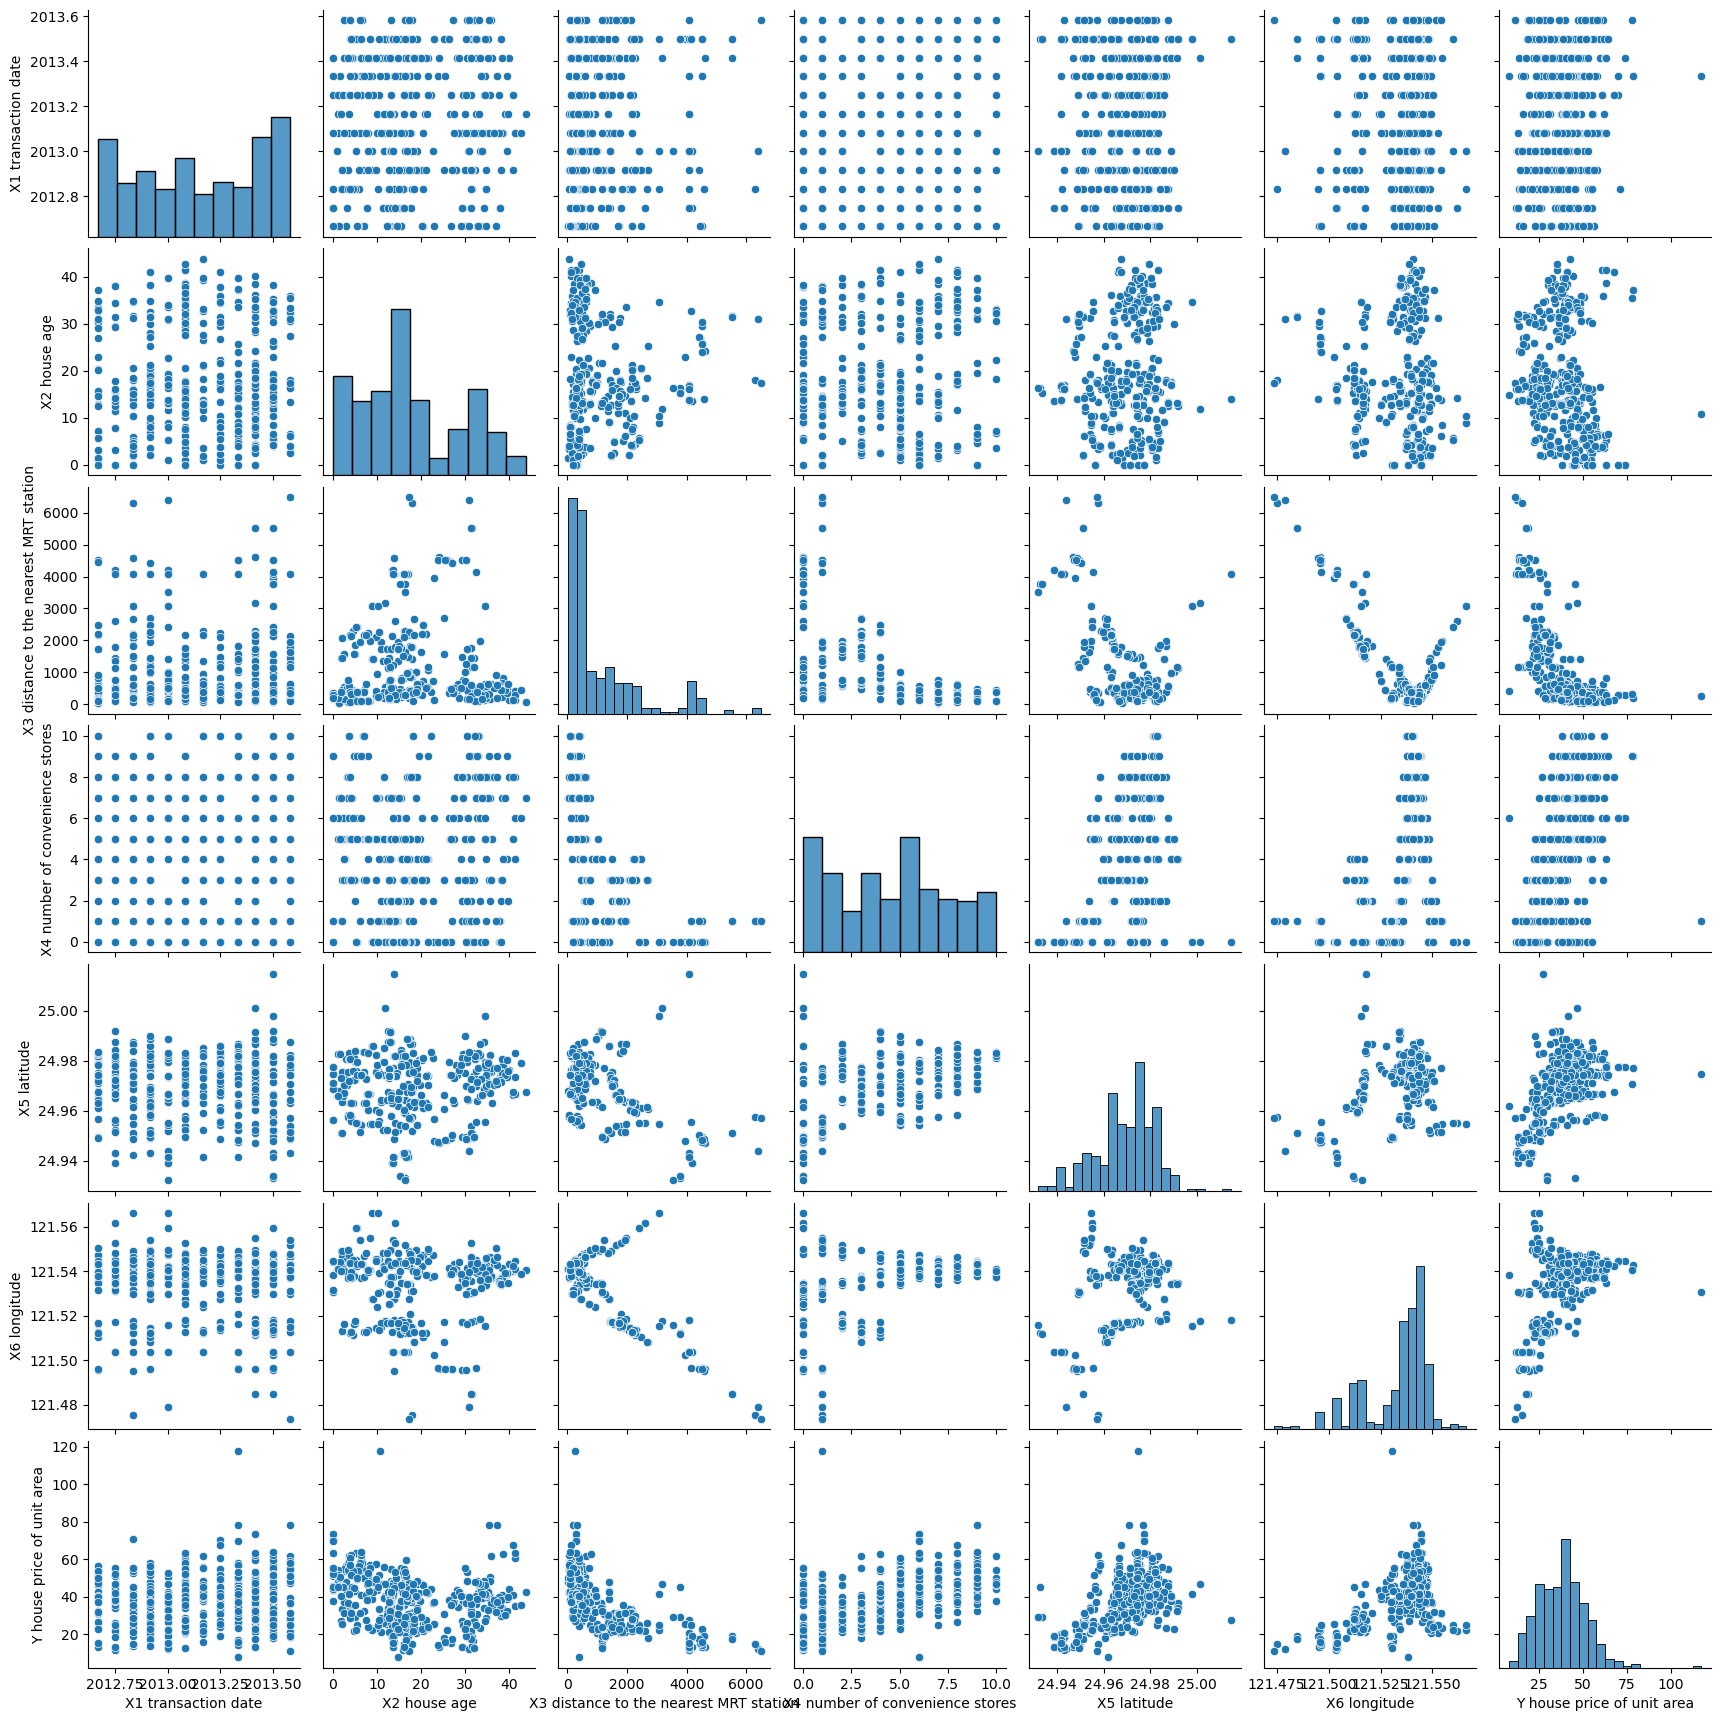

In [5]:
sns.pairplot(rs_df)

In [6]:
rs_df.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [7]:
rs_df.corr()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X1 transaction date,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


In [8]:
# hw_df.drop("CRIM", axis=1)
print(rs_df.isnull().sum())
X = rs_df.iloc[:,:-1]
Y = rs_df.iloc[:,-1]
X.shape, Y.shape

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


((414, 6), (414,))

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, random_state=2, test_size=0.3)
X_train.shape, Y_train.shape

((289, 6), (289,))

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_train.shape, X_train.ndim

((289, 6), 2)

In [11]:
from sklearn.linear_model import LinearRegression
m = LinearRegression()
m.fit(X_train, Y_train)

LinearRegression()

In [12]:
X_test.shape, m.predict(X_test).shape

((125, 6), (125,))

In [13]:
m.score(X_test, Y_test), m.score(X_train, Y_train)

(0.5061624867214332, 0.6173235366668923)

In [14]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score
print("Test Dataset",mean_absolute_error(Y_test, m.predict(X_test)), root_mean_squared_error(Y_test, m.predict(X_test)), r2_score(Y_test, m.predict(X_test)))
print("Train Dataset",mean_absolute_error(Y_train, m.predict(X_train)), root_mean_squared_error(Y_train, m.predict(X_train)), r2_score(Y_train, m.predict(X_train)))

Test Dataset 6.941174547189145 10.403438035819265 0.5061624867214332
Train Dataset 5.887220164570148 8.05142396682571 0.6173235366668923


In [15]:
import seaborn as sns

<Axes: xlabel='X1 transaction date', ylabel='Y house price of unit area'>

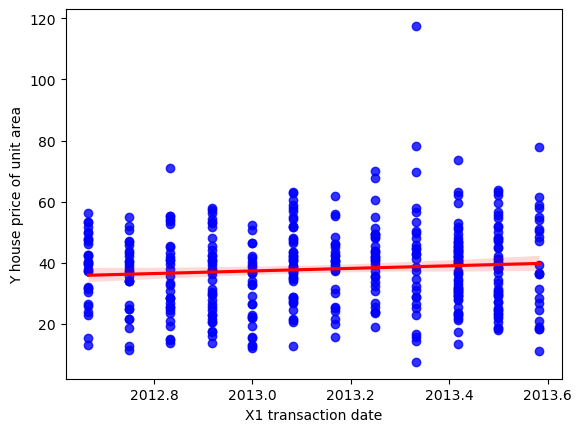

In [16]:
# To get the linea regression model between pairs (2D plot)
sns.regplot(
    x="X1 transaction date", 
    y="Y house price of unit area", 
    data=rs_df, 
    scatter_kws={"color": "blue"}, 
    line_kws={"color": "red"}
)

In [17]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(m, X_train, Y_train, scoring="neg_mean_squared_error", cv=5)
# validation_score = cross_val_score(m, X_train, Y_train, scoring="roc_auc" ,cv=5)
validation_score

array([ -72.89019086, -106.68388272,  -49.91108298,  -61.58919084,
        -58.88327957])

## Asumptions

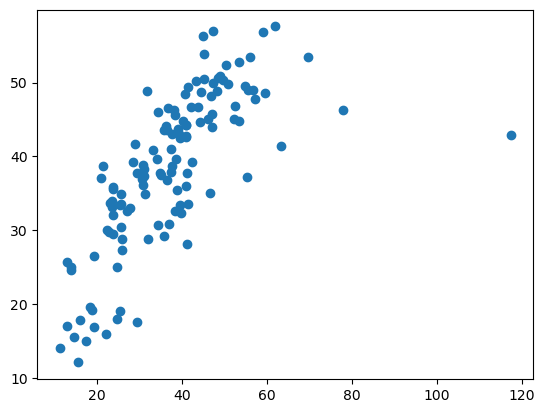

In [19]:
## Asumptions
# plot between y_test an predicted values of X-test if it is linear .. model performs well
plt.scatter(Y_test, m.predict(X_test))

In [22]:
residulas = Y_test - m.predict(X_test)
# residulas

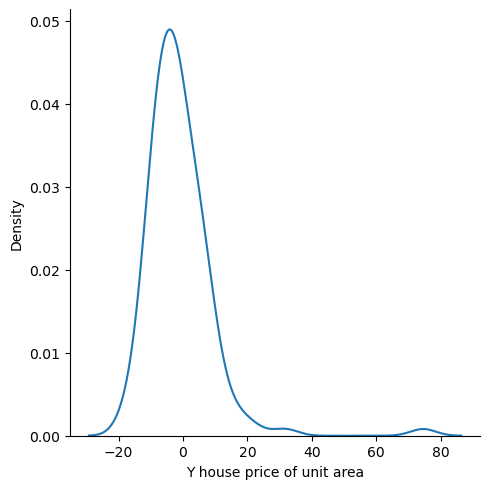

In [24]:
# plot the residulas
# nomral distribution
sns.displot(residulas, kind="kde")

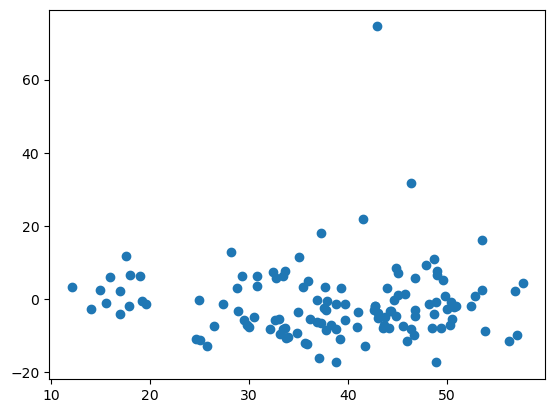

In [25]:
# scattar plot with residuals and prediction
# it should not follow any distribution pattern
plt.scatter(m.predict(X_test), residulas)

# Linear Regression on Height and Weight Datset (own)

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [97]:
hw_dataset_path = "HeightWeight.csv"
hw_dataframe = pd.read_csv(hw_dataset_path)

hw_dataframe = hw_dataframe.drop(hw_dataframe.columns[0], axis=1)

hw_dataframe.head()
# input_feature = hw_dataframe.iloc[:,:-1]
# input_feature_nparray = np.asarray(input_feature)
# input_feature_nparray.ndim
# hw_dataframe.iloc[:,0]

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


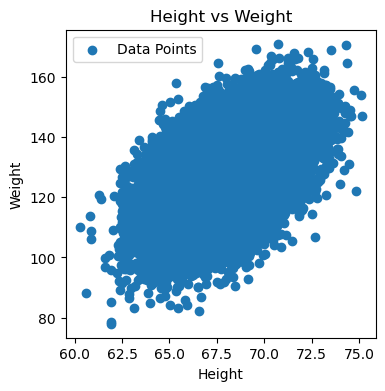

In [98]:
# scatter plot
plt.figure(figsize=(4,4))
plt.scatter(hw_dataframe.iloc[:,0], hw_dataframe.iloc[:,-1], label="Data Points")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Height vs Weight")
plt.legend()
plt.show()

In [99]:
hw_dataframe.corr()

,Height(Inches),Weight(Pounds)
Height(Inches),1.000000,0.502859
Weight(Pounds),0.502859,1.000000


In [100]:
hw_dataframe.describe()

,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000
mean,67.993114,127.079421
std,1.901679,11.660898
min,60.278360,78.014760
25%,66.704397,119.308675
50%,67.995700,127.157750
75%,69.272958,134.892850
max,75.152800,170.924000


In [101]:
# Normalize the data based on meand and standarad devaiation
# normalized_df = (hw_dataframe - hw_dataframe.mean()) / hw_dataframe.std()
# normalized_df.head(), normalized_df.describe(), normalized_df.corr()

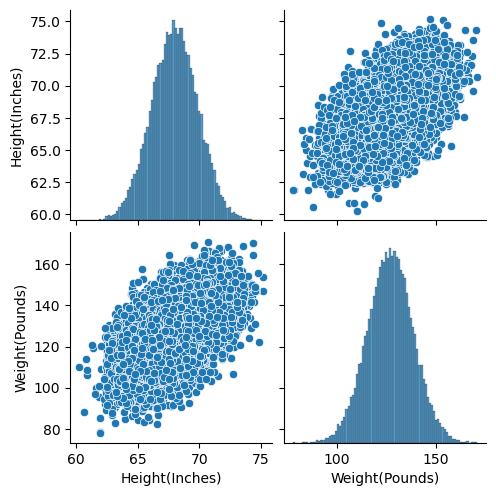

In [102]:
import seaborn as sns
sns.pairplot(hw_dataframe)

In [103]:
input_feature = np.array(hw_dataframe.iloc[:,:-1])
input_feature.shape
output_feature = np.array(hw_dataframe.iloc[:,-1]).reshape(-1,1)
output_feature.shape

(25000, 1)

In [104]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(input_feature, output_feature, test_size=0.3, random_state=2)
X_train.shape, Y_train.shape

((17500, 1), (17500, 1))

In [105]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit_transform(X_train)

# Normalize the data based on meand and standarad devaiation
# normalized_df = (hw_dataframe - hw_dataframe.mean()) / hw_dataframe.std()
# normalized_df.head(), normalized_df.describe(), normalized_df.corr()

In [117]:
# using closed form solution
class LineaRegressionForOneInputFeature:
    def __init__(self):
        self.w0 = None
        self.w1 = None

    def fitUsingClosedFormSolution(self, X, Y):
        ybar = np.mean(Y)
        xbar = np.mean(X)
        xybar = np.mean(X * Y)
        x2bar = np.mean(X ** 2)
        # ybar = w0 + w1 * xbar
        # xybar = w0*xbar + w1 * x2bar

        A = np.array([[1, xbar],[xbar, x2bar]])
        B = np.array([ybar,xybar])
        solution = np.linalg.solve(A,B)
        self.w0 = solution[0]
        self.w1 = solution[1]
        return self.w0, self.w1

    def predict(self,x):
        return self.w0 + self.w1 * x
    

    def r2score(self,X,Y):
        ssr = np.sum((Y - self.predict(X)) ** 2)
        sst = np.sum((Y - np.mean(Y)) ** 2)
        return 1 - (ssr / sst)


        

In [128]:
m = LineaRegressionForOneInputFeature()
print(m.fitUsingClosedFormSolution(X_train, Y_train))
print(m.r2score(X_test, Y_test), m.r2score(X_train, Y_train))
# m.fitUsingClosedFormSolution(X_train, Y_train)


(-82.97456660518236, 3.089114772081904)
0.24893656937221453 0.25458964083835467


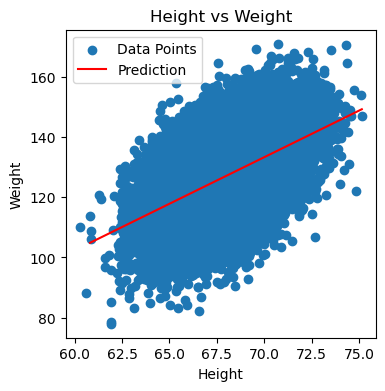

In [111]:
plt.figure(figsize=(4,4))
plt.scatter(hw_dataframe.iloc[:,0], hw_dataframe.iloc[:,-1], label="Data Points")

genrated = np.linspace(X_train.max(), X_train.min(), 200)
plt.plot(genrated, m.predict(genrated),'r-' ,label="Prediction")

plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Height vs Weight")
plt.legend()
plt.show()

`Means the above data for height and weight is not suitable for linear regression beacause of lowr2score for train as well as test`

# Linear Regression on Weight and Height Dataset (using scikit learn)

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [116]:
hw_dataset_path = "HeightWeight.csv"
hw_dataframe = pd.read_csv(hw_dataset_path)

hw_dataframe = hw_dataframe.drop(hw_dataframe.columns[0], axis=1)

hw_dataframe.head()
# input_feature = hw_dataframe.iloc[:,:-1]
# input_feature_nparray = np.asarray(input_feature)
# input_feature_nparray.ndim
# hw_dataframe.iloc[:,0]

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


In [121]:
input_feature = np.array(hw_dataframe.iloc[:,:-1])
input_feature.shape
output_feature = np.array(hw_dataframe.iloc[:,-1]).reshape(-1,1)
output_feature.shape

(25000, 1)

In [122]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(input_feature, output_feature, test_size=0.3, random_state=2)
X_train.shape, Y_train.shape

((17500, 1), (17500, 1))

In [123]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [124]:
model.intercept_, model.coef_

(array([-82.97456661]), array([[3.08911477]]))

In [129]:
model.score(X_test, Y_test), model.score(X_train, Y_train)

(0.24893656937221387, 0.25458964083835467)

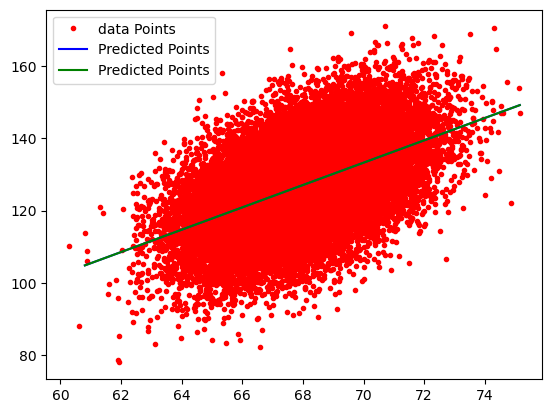

In [136]:
plt.plot(input_feature, output_feature, "r.", label="data Points")
genrated = np.linspace(X_train.min(), X_train.max(),2000).reshape(-1,1)
plt.plot(genrated, m.predict(genrated), "b-", label="Predicted Points")
plt.plot(genrated, model.predict(genrated), "g-", label="Predicted Points")

plt.legend()
plt.show()


In [147]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, root_mean_squared_error, r2_score

mean_absolute_error(Y_test, model.predict(X_test)), mean_absolute_error(Y_test, m.predict(X_test)), root_mean_squared_error(Y_test, m.predict(X_test)), root_mean_squared_error(Y_test, model.predict(X_test))
r2_score(Y_test, model.predict(X_test)), r2_score(Y_test, m.predict(X_test))
model.score(X_test, Y_test), m.r2score(X_test, Y_test)


(0.24893656937221387, 0.24893656937221453)

# Ploynomial Regression (Curve fitting)

## Quadratic relationship with one input feature (using gradient descent)

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# create the dataset
X = np.linspace(0,5, 200).reshape(-1,1)
h0 = -5
h1 = 6
h2 = 8
Y = h0 + h1 * X + h2 * X ** 2
X.shape, Y.shape

((200, 1), (200, 1))

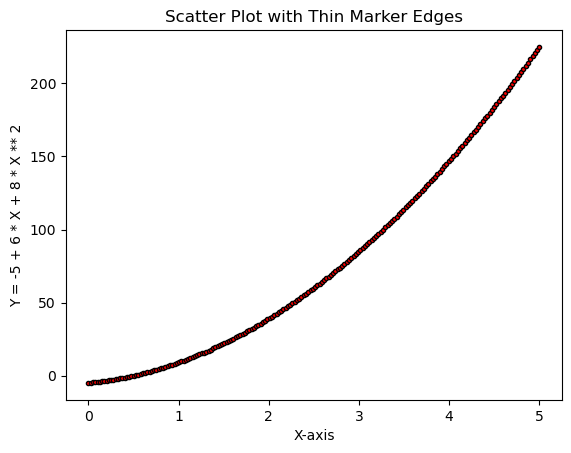

In [49]:
plt.scatter(X, Y, marker='.', linewidths=1, edgecolor='black', color="red")
plt.xlabel("X-axis")
labely = f"Y = {h0} + {h1} * X + {h2} * X ** 2"
plt.ylabel(labely)
plt.title("Scatter Plot with Thin Marker Edges")
plt.show()

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=2)
X_train.shape, Y_train.shape

((140, 1), (140, 1))

In [160]:
class curveFitting:
    def __init__(self):
        self.w0 = np.random.rand(1)
        self.w1 = np.random.rand(1)
        self.w2 = np.random.rand(1)
        self.lr = 1e-05
        self.epoch = 1000

    def predict(self, x):
        return self.w0 + self.w1 * x + self.w2 * x ** 2

    def curveFitUsingGD(self, X, Y) :
        print("Before Update :: ", self.w0 , self.w1, self.w2)
        for i in range(self.epoch):
            l = 2 * (self.predict(X) - Y )
            dw0 = np.sum(l * 1)
            dw1 = np.sum(l * X)
            dw2 = np.sum(l * X ** 2)

            self.w0 -= self.lr * dw0
            self.w1 -= self.lr * dw1
            self.w2 -= self.lr * dw2
        return self.w0, self.w1, self.w2
    
    def rmseloss(self, X_test, Y_test):
        l = (np.sum((Y_test - self.predict(X_test)) ** 2) * 1 / X_test.size) ** 1/2
        return l

In [161]:
c = curveFitting()
print("After Update :: ", c.curveFitUsingGD(X_train, Y_train))
print("RMSE Loss Test :: ", c.rmseloss(X_test, Y_test) )
print("RMSE Loss Train :: ", c.rmseloss(X_train, Y_train) )


Before Update ::  [0.13783534] [0.75140398] [0.74700388]
After Update ::  (array([-0.73652018]), array([2.43633541]), array([8.6054585]))
RMSE Loss Test ::  1.5650071562127126
RMSE Loss Train ::  0.8107068041834897


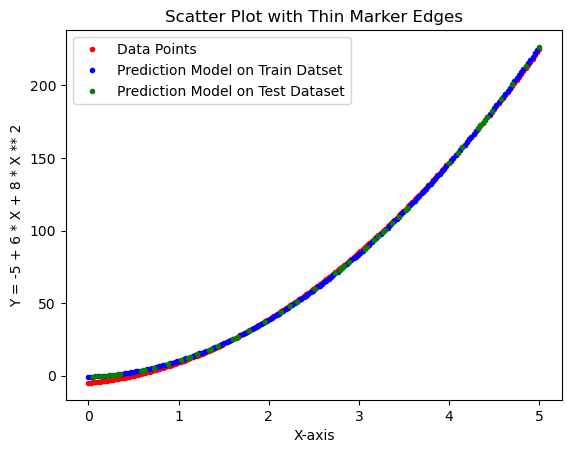

In [162]:
plt.plot(X, Y, 'r.', label="Data Points" )
plt.plot(X_train, c.predict(X_train), "b.", label="Prediction Model on Train Datset")
plt.plot(X_test, c.predict(X_test), "g.", label="Prediction Model on Test Dataset")

plt.xlabel("X-axis")
labely = f"Y = {h0} + {h1} * X + {h2} * X ** 2"
plt.ylabel(labely)
plt.title("Scatter Plot with Thin Marker Edges")
plt.legend()
plt.show()

In [165]:
class curveFitting:
    def __init__(self):
        self.w0 = np.random.rand(1)
        self.w1 = np.random.rand(1)
        self.w2 = np.random.rand(1)
        self.epoch = 1000

    def predict(self, x):
        return self.w0 + self.w1 * x + self.w2 * x ** 2

    def curveFitUsingGD(self, X, Y, lr) :
        print("Before Update :: ", self.w0 , self.w1, self.w2)
        for i in range(self.epoch):
            l = 2 * (self.predict(X) - Y )
            dw0 = np.sum(l * 1)
            dw1 = np.sum(l * X)
            dw2 = np.sum(l * X ** 2)

            self.w0 -= lr * dw0
            self.w1 -= lr * dw1
            self.w2 -= lr * dw2
        return self.w0, self.w1, self.w2
    
    def rmseloss(self, X_test, Y_test):
        l = (np.sum((Y_test - self.predict(X_test)) ** 2) * 1 / X_test.size) ** 1/2
        return l

In [166]:
lr_array = [1e-01, 1e-02, 1e-03, 1e-04, 1e-05, 1e-06, 1e-07]

In [167]:
for lr in lr_array:
    print("LR => :: ", lr)
    c = curveFitting()
    print("After Update :: ", c.curveFitUsingGD(X_train, Y_train, lr))
    print("RMSE Loss Test :: ", c.rmseloss(X_test, Y_test) )
    print("RMSE Loss Train :: ", c.rmseloss(X_train, Y_train) )

LR => ::  0.1
Before Update ::  [0.03976684] [0.89513273] [0.41500759]
After Update ::  (array([nan]), array([nan]), array([nan]))
RMSE Loss Test ::  nan
RMSE Loss Train ::  nan
LR => ::  0.01
Before Update ::  [0.63943211] [0.58647442] [0.60140183]
After Update ::  (array([nan]), array([nan]), array([nan]))
RMSE Loss Test ::  nan
RMSE Loss Train ::  nan
LR => ::  0.001
Before Update ::  [0.40735808] [0.83681527] [0.74965297]
After Update ::  (array([nan]), array([nan]), array([nan]))
RMSE Loss Test ::  nan
RMSE Loss Train ::  nan
LR => ::  0.0001
Before Update ::  [0.90674107] [0.35808986] [0.82006733]
After Update ::  (array([nan]), array([nan]), array([nan]))
RMSE Loss Test ::  nan
RMSE Loss Train ::  nan
LR => ::  1e-05
Before Update ::  [0.28905121] [0.88697443] [0.94043481]
After Update ::  (array([-0.69733826]), array([2.41936094]), array([8.60707297]))
RMSE Loss Test ::  1.59409980172007
RMSE Loss Train ::  0.8237691685721594
LR => ::  1e-06
Before Update ::  [0.19636941] [0.07

c:\Users\sande\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\sande\AppData\Local\Temp\ipykernel_20100\1235586455.py:16: RuntimeWarning: overflow encountered in multiply
  dw1 = np.sum(l * X)
C:\Users\sande\AppData\Local\Temp\ipykernel_20100\1235586455.py:17: RuntimeWarning: overflow encountered in multiply
  dw2 = np.sum(l * X ** 2)
C:\Users\sande\AppData\Local\Temp\ipykernel_20100\1235586455.py:9: RuntimeWarning: invalid value encountered in multiply
  return self.w0 + self.w1 * x + self.w2 * x ** 2


## Polynomial Regression using Sklearn

In [174]:
from sklearn.linear_model import LinearRegression
m = LinearRegression()
m.fit(X_train, Y_train)

LinearRegression()

In [175]:
from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(X_test, Y_test)

95.3183546092408

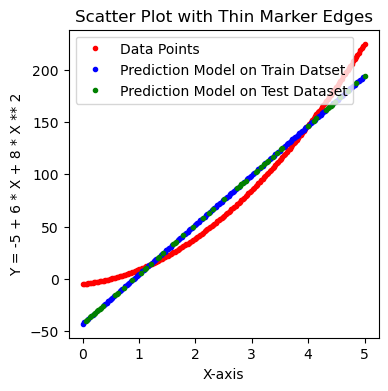

In [177]:
plt.figure(figsize=(4,4))
plt.plot(X, Y, 'r.', label="Data Points" )
plt.plot(X_train, m.predict(X_train), "b.", label="Prediction Model on Train Datset")
plt.plot(X_test, m.predict(X_test), "g.", label="Prediction Model on Test Dataset")

plt.xlabel("X-axis")
labely = f"Y = {h0} + {h1} * X + {h2} * X ** 2"
plt.ylabel(labely)
plt.title("Scatter Plot with Thin Marker Edges")
plt.legend()
plt.show()

In [183]:
# So we need a polynomial model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

In [190]:
# Step 2: Create polynomial features
degree = 2  # Degree of the polynomial
poly_features = PolynomialFeatures(degree=degree, include_bias=True)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)


# Step 3: Train the model
model = LinearRegression()
model.fit(X_train_poly, Y_train)

root_mean_squared_error(Y_test, model.predict(X_test_poly))

model.coef_,model.intercept_

(array([[0., 6., 8.]]), array([-5.]))

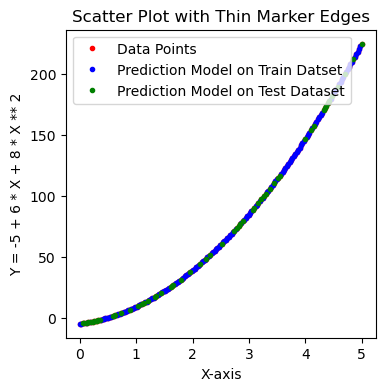

In [186]:
plt.figure(figsize=(4,4))
plt.plot(X, Y, 'r.', label="Data Points" )
plt.plot(X_train, model.predict(X_train_poly), "b.", label="Prediction Model on Train Datset")
plt.plot(X_test, model.predict(X_test_poly), "g.", label="Prediction Model on Test Dataset")

plt.xlabel("X-axis")
labely = f"Y = {h0} + {h1} * X + {h2} * X ** 2"
plt.ylabel(labely)
plt.title("Scatter Plot with Thin Marker Edges")
plt.legend()
plt.show()

# Polynomial regression vs Linear Regression using scikit learn

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [195]:
rs_df = pd.read_csv("./HeightWeight.csv")
rs_df.drop("Index", axis=1, inplace=True )
rs_df.head()

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


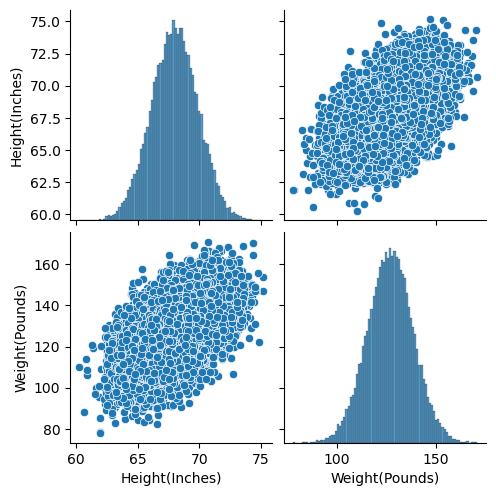

In [196]:
sns.pairplot(rs_df)

In [198]:
rs_df.corr()

,Height(Inches),Weight(Pounds)
Height(Inches),1.000000,0.502859
Weight(Pounds),0.502859,1.000000


In [204]:
X = rs_df.iloc[:,:-1]
Y = rs_df.iloc[:,-1].to_numpy().reshape(-1,1)
X.shape, Y.shape

((25000, 1), (25000, 1))

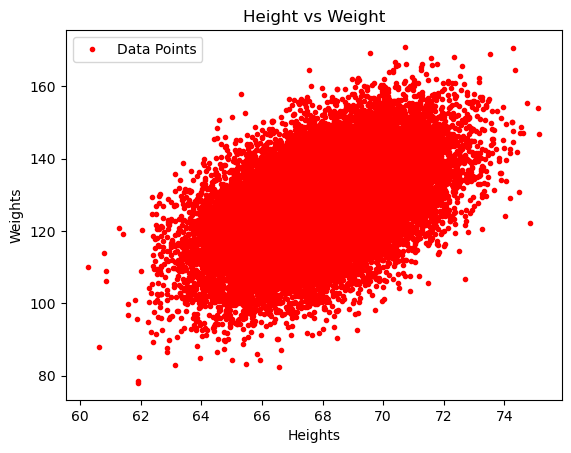

In [207]:
plt.plot(X,Y, "r.",label="Data Points")
plt.xlabel("Heights")
plt.ylabel("Weights")
plt.title("Height vs Weight")
plt.legend()
plt.show()

In [208]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=2)
X_train.shape, Y_train.shape

((17500, 1), (17500, 1))

In [215]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score

linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)
Y_pred_test = linear_model.predict(X_test)
Y_pred_train = linear_model.predict(X_train)

print("RMSE :: ", root_mean_squared_error(Y_test, Y_pred_test))
print("R2-Score :: ", r2_score(Y_test, Y_pred_test))

RMSE ::  10.205767391273955
R2-Score ::  0.24893656937221387


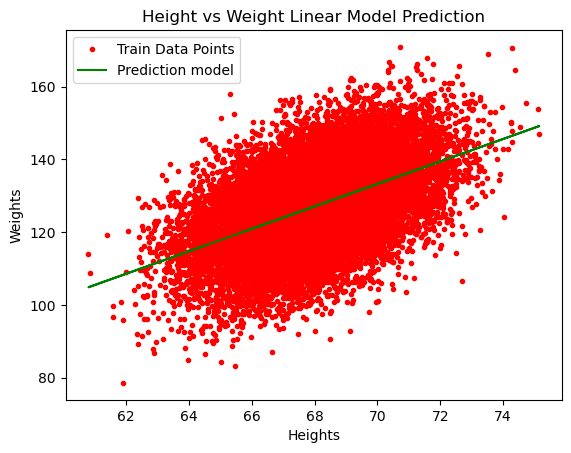

In [218]:
plt.plot(X_train,Y_train, "r.",label="Train Data Points")
plt.plot(X_train, Y_pred_train, "g-", label="Prediction model")
plt.xlabel("Heights")
plt.ylabel("Weights")
plt.title("Height vs Weight Linear Model Prediction")
plt.legend()
plt.show()

In [239]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score

poly_model = PolynomialFeatures(degree=5, include_bias=True)

X_train_poly = poly_model.fit_transform(X_train)
X_test_poly = poly_model.transform(X_test)
print("X_train_Poly :: ", X_train_poly.shape)
linear_poly = LinearRegression()
linear_poly.fit(X_train_poly, Y_train)
Y_pred_train_poly = linear_poly.predict(X_train_poly)
Y_pred_test_poly = linear_poly.predict(X_test_poly)


print("RMSE :: ", root_mean_squared_error(Y_test, Y_pred_test_poly))
print("R2-Score :: ", r2_score(Y_test, Y_pred_test_poly))



X_train_Poly ::  (17500, 6)
RMSE ::  10.207214111319942
R2-Score ::  0.24872362006751492


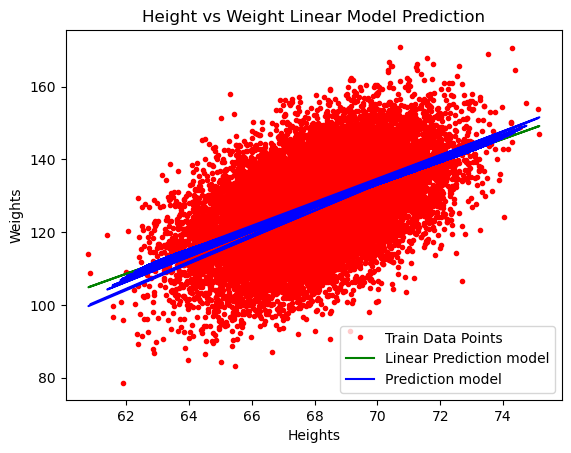

In [233]:
plt.plot(X_train,Y_train, "r.",label="Train Data Points")
plt.plot(X_train, Y_pred_train, "g-", label="Linear Prediction model")
plt.plot(X_train, Y_pred_train_poly, "b-", label="Prediction model")

plt.xlabel("Heights")
plt.ylabel("Weights")
plt.title("Height vs Weight Linear Model Prediction")
plt.legend()
plt.show()

In [237]:
print(linear_poly.coef_)
print(linear_poly.intercept_)

[[ 0.00000000e+00  6.13964710e+04 -1.79872544e+03  2.63272250e+01
  -1.92506665e-01  5.62575180e-04]]
[-837538.18673165]


## We can use the pipeline as well to fit the polynomail regression and then linear model .. as above